In [2]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving RF_CSV_DATAFILE.csv to RF_CSV_DATAFILE.csv


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
import math
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [4]:
df = pd.read_csv('RF_CSV_DATAFILE.csv')
df.head()

<ipython-input-4-0950388396bd>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('RF_CSV_DATAFILE.csv')


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,NaN
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,NaN
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,NaN
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,NaN
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,NaN


In [ ]:
Xb = df.drop(columns=['resale_price', 'price_per_sqm', 'block_encoded', 'street_name_encoded'], axis = 1)
yb = df['resale_price']

In [5]:
df['age_of_flat'] = 2024 - df['lease_commence_date']

In [6]:
df['remaining_lease'].fillna(99 - df['age_of_flat'], inplace=True)

In [7]:
def get_remaining_lease_months(remaining_lease):
    if pd.isna(remaining_lease):  # Check if the value is NaN
        return None
    if isinstance(remaining_lease, float) or isinstance(remaining_lease, int) :  # Check if the value is a float, representing years only
        return remaining_lease * 12

    try:
        years_part, months_part = remaining_lease.split('years')
        years = int(years_part)
        months = int(months_part.split('months')[0])
        return years * 12 + months
    except ValueError:
        # Handle cases where the format might not exactly match the expected pattern
        try:
            # Assume format might be like "10 years" without months
            years = int(remaining_lease.split('years')[0])
            return years * 12
        except ValueError:
            return None  # If format is incorrect or unparsable

# Apply the function to the DataFrame
df['remaining_lease_months'] = df['remaining_lease'].apply(get_remaining_lease_months)

In [8]:
def num_rooms(flat_type):
    mapping = {
        '1 ROOM': 1,
        '2 ROOM': 2,
        '3 ROOM': 3,
        '4 ROOM': 4,
        '5 ROOM': 4.5,
        'EXECUTIVE': 6,  # Assumption, can vary based on data
        'MULTI GENERATION': 5  # Assumption, can vary based on data
    }
    return mapping.get(flat_type, 0)

# Create a column for number of rooms
df['num_rooms'] = df['flat_type'].apply(num_rooms)

In [9]:
df.drop(columns=['month', 'remaining_lease', 'block', 'street_name'], inplace = True)

In [10]:
town_encoder = LabelEncoder()
flat_type_encoder = LabelEncoder()
storey_range_encoder = LabelEncoder()
flat_model_encoder = LabelEncoder()


df['town_encoded'] = town_encoder.fit_transform(df['town'])
df['flat_type_encoded'] = flat_type_encoder.fit_transform(df['flat_type'])
df['storey_range_encoded'] = storey_range_encoder.fit_transform(df['storey_range'])
df['flat_model_encoded'] = flat_model_encoder.fit_transform(df['flat_model'])

In [11]:
df.drop(columns=['town', 'flat_type', 'storey_range', 'flat_model'], inplace = True)

In [13]:
df.dtypes

floor_area_sqm            float64
lease_commence_date         int64
resale_price              float64
age_of_flat                 int64
remaining_lease_months    float64
num_rooms                 float64
town_encoded                int64
flat_type_encoded           int64
storey_range_encoded        int64
flat_model_encoded          int64
dtype: object

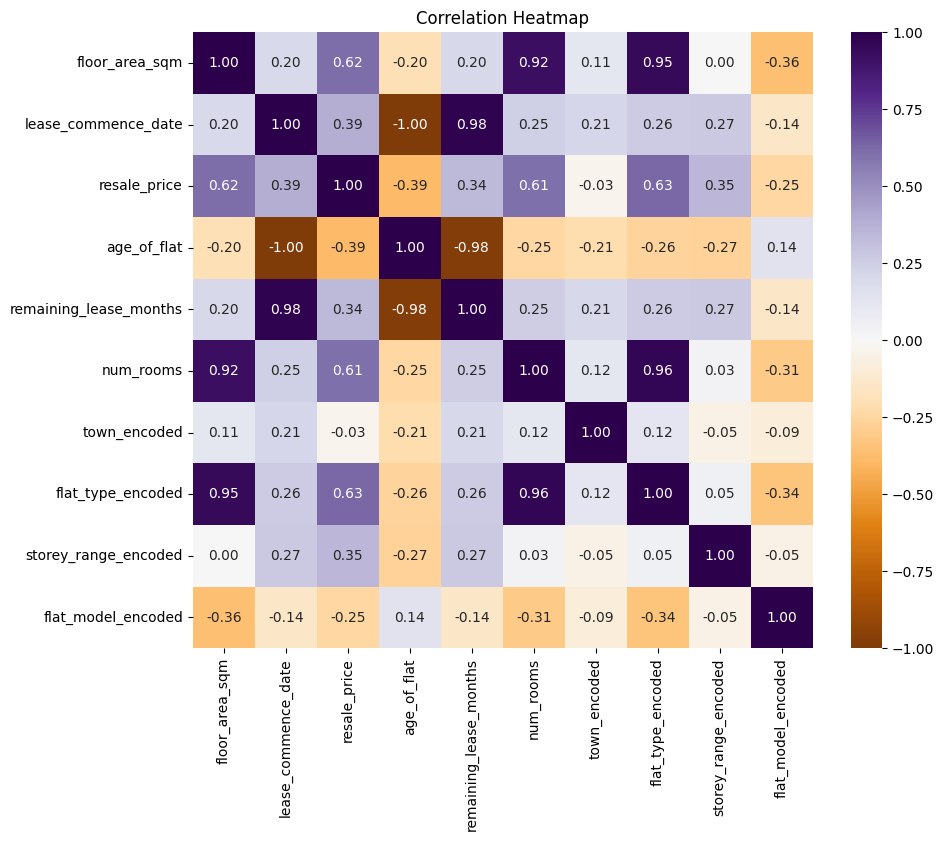

In [14]:
# Calculate the correlation matrix
numerical_columns = ['floor_area_sqm', 'lease_commence_date', 'resale_price', 'age_of_flat',
                     'remaining_lease_months', 'num_rooms', 'town_encoded', 'flat_type_encoded',
                    'storey_range_encoded', 'flat_model_encoded']

# Calculate the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='PuOr', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [12]:
X = df.drop('resale_price', axis = 1)
y = df['resale_price']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [17]:
# Predict on training and test sets
train_pred = dtr.predict(X_train)
test_pred = dtr.predict(X_test)

# Calculate regression metrics
train_mse = mean_squared_error(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

print(f"Train MSE: {train_mse}, Train R²: {train_r2}")
print(f"Test MSE: {test_mse}, Test R²: {test_r2}")
print(math.sqrt(train_mse))
print(math.sqrt(test_mse))

Train MSE: 199254217.99329558, Train R²: 0.9923361583614723
Test MSE: 2103280867.909315, Test R²: 0.9187288636583237
14115.743621690484
45861.54018248095


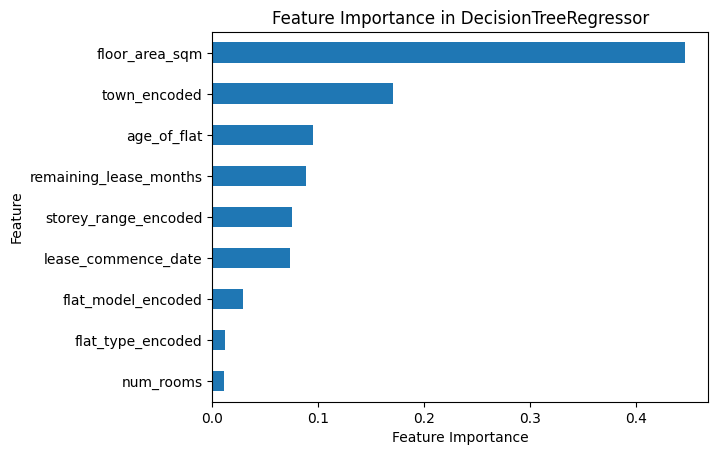

In [18]:
feature_importances = pd.Series(dtr.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in DecisionTreeRegressor')
plt.show()

In [19]:
parameters = dtr.get_params()
print("Model parameters:", parameters)

Model parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}


In [20]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution
param_dist = {
    'ccp_alpha': [0.05, 0.075, 0.1],
    'max_depth': [10, 15, 20,],
    'min_samples_split': [7, 10, 12, 15],
    'min_samples_leaf': [3, 5, 10, 15],
    'max_features': [ 'sqrt', 'log2'],
    'criterion': ['squared_error']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dtr, param_distributions=param_dist, n_iter=70, cv=5, scoring='neg_mean_squared_error',
                                   random_state=0, n_jobs=2)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Predict using the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
test_mse1 = mean_squared_error(y_test, y_pred)
test_r2_1 = r2_score(y_test, y_pred)
print(math.sqrt(test_mse1))
print(test_r2_1)

Best parameters: {'min_samples_split': 12, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'squared_error', 'ccp_alpha': 0.1}
Best score: -3212367914.7080803
57084.559278102846
0.8740853201357339


In [21]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution
param_dist = {
    'ccp_alpha': [0.090, 0.1, 0.15],
    'max_depth': [18, 20, 22, 24, 26],
    'min_samples_split': [11, 12, 13, 14],
    'min_samples_leaf': [3, 4, 5],
    'max_features': [ 'sqrt', 'log2'],
    'criterion': ['squared_error']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dtr, param_distributions=param_dist, n_iter=70, cv=5, scoring='neg_mean_squared_error',
                                   random_state=0, n_jobs=2)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Predict using the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
test_mse1 = mean_squared_error(y_test, y_pred)
test_r2_1 = r2_score(y_test, y_pred)
print(math.sqrt(test_mse1))
print(test_r2_1)

Best parameters: {'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 26, 'criterion': 'squared_error', 'ccp_alpha': 0.15}
Best score: -2814763806.5643306
52323.066738623565
0.8942146707064764


In [22]:
# Define the parameter distribution
param_dist = {
    'ccp_alpha': [0.15, 0.175, 0.2],
    'max_depth': [26, 28, 30, 32],
    'min_samples_split': [10, 13, 16, 19, 22],
    'min_samples_leaf': [3, 4, 5],
    'max_features': [ 'sqrt', 'log2'],
    'criterion': ['squared_error']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dtr, param_distributions=param_dist, n_iter=70, cv=5, scoring='neg_mean_squared_error',
                                   random_state=0, n_jobs=2)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Predict using the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
test_mse1 = mean_squared_error(y_test, y_pred)
test_r2_1 = r2_score(y_test, y_pred)
print(math.sqrt(test_mse1))
print(test_r2_1)

Best parameters: {'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 26, 'criterion': 'squared_error', 'ccp_alpha': 0.15}
Best score: -2806486409.281382
53611.908672590675
0.8889389950363187


In [23]:
# Save the model and encoders
with open('best_model.pkl', 'wb') as file:
     pickle.dump(best_model, file)

with open('town_encoder3.pkl', 'wb') as file:
    pickle.dump(town_encoder, file)

with open('flat_type_encoder3.pkl', 'wb') as file:
    pickle.dump(flat_type_encoder, file)

with open('storey_range_encoder3.pkl', 'wb') as file:
    pickle.dump(storey_range_encoder, file)

with open('flat_model_encoder3.pkl', 'wb') as file:
    pickle.dump(flat_model_encoder, file)

In [24]:
from google.colab import files

# Download each file
files.download('best_model.pkl')
files.download('town_encoder3.pkl')
files.download('flat_type_encoder3.pkl')
files.download('storey_range_encoder3.pkl')
files.download('flat_model_encoder3.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>